 # **Spam Email Detection**

---
****

**Import necessary packages**

In [ ]:
# Loan Default Prediction
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from warnings import filterwarnings

**Load and Preprocess the Data**

In [ ]:
# Load the data
df = pd.read_csv('/content/spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Drop unnecessary columns**

In [ ]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Rename columns for clarity**

In [ ]:
df.rename(columns = {'v1':'labels', 'v2':'message'}, inplace=True)
df.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Remove duplicate rows**

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(5169, 2)

**Map labels to numerical values**

In [ ]:
df['label'] = df['labels'].map({'ham': 0, 'spam': 1})
df.head()


,labels,message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


**Drop the original 'labels' column**

In [ ]:
df.drop(['labels'], axis=1, inplace=True)
df.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


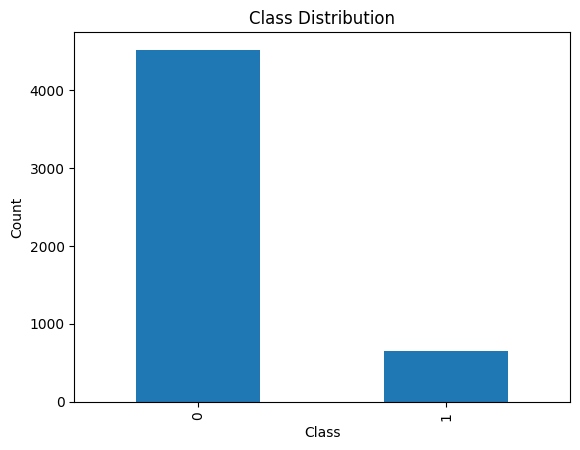

In [ ]:
df['label'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

**Prepare the Data for Modeling**

**Separate features and labels**

In [ ]:
x = df['message']
y = df['label']
cv = CountVectorizer()
x= cv.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

classifier = MultinomialNB().fit(x_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(x_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix:\n',confusion_matrix(y_test, pred))
print()
print('Accuracy : ',accuracy_score(y_test, pred))
precision = precision_score(y_test, pred)
print('Precision:', precision)
f1 = f1_score(y_test, pred)
print('F1 Score:', f1)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       885
           1       0.91      0.93      0.92       149

    accuracy                           0.98      1034
   macro avg       0.95      0.96      0.96      1034
weighted avg       0.98      0.98      0.98      1034


Confusion Matrix:
 [[872  13]
 [ 10 139]]

Accuracy :  0.9777562862669246
Precision: 0.9144736842105263
F1 Score: 0.9235880398671096


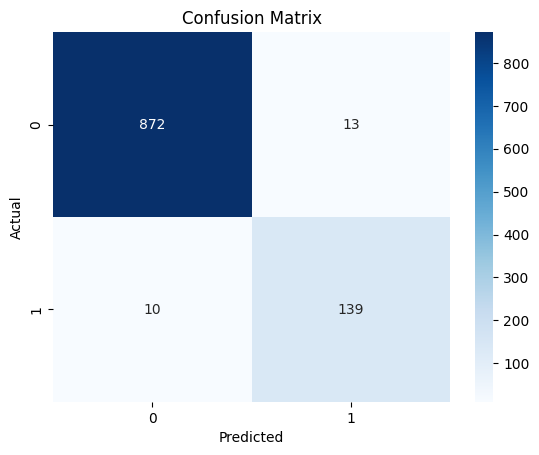

In [ ]:
# Visualize the confusion matrix
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


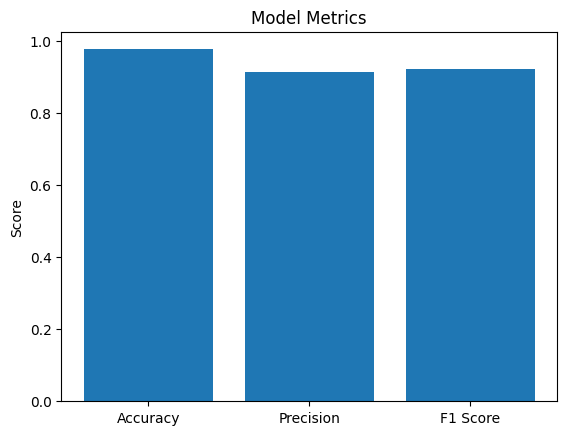

In [ ]:
# Create a bar chart to compare metrics
metrics = [accuracy_score(y_test, pred), precision, f1]
metric_names = ['Accuracy', 'Precision', 'F1 Score']
plt.bar(metric_names, metrics)
plt.title("Model Metrics")
plt.ylabel("Score")
plt.show()


**Spam Email Detection Report**

**1. Introduction**

Spam email poses a significant threat to individuals and organizations, leading to potential security risks, privacy invasion, and resource wastage. In this report, we present the development and evaluation of a spam email detection model using a Multinomial Naive Bayes classifier.

**2. Data Exploration and Preprocessing**

The dataset used for this project was sourced from 'spam.csv,' containing information about messages labeled as 'ham' (non-spam) and 'spam.' The initial exploration involved loading the data, handling missing values, and dropping unnecessary columns (Unnamed: 2, Unnamed: 3, Unnamed: 4). The dataset was then cleaned by removing duplicate entries, and columns were appropriately renamed for clarity.

**3. Data Representation and Splitting**

The text data in the 'message' column was transformed into a numerical format using the CountVectorizer, a common technique for converting text into a matrix of token counts. The dataset was split into training and testing sets to facilitate model training and evaluation.

**4. Model Training**

A Multinomial Naive Bayes classifier was selected for this task, given its effectiveness in text classification problems. The model was trained on the training set using the fit method.

**5. Model Evaluation**

The trained model was evaluated on the test set, and its performance was assessed using various metrics.

- **Confusion Matrix:**
  The confusion matrix provides a detailed breakdown of the model's predictions, showing 872 true negatives (non-spam correctly predicted), 13 false positives (non-spam incorrectly predicted as spam), 10 false negatives (spam incorrectly predicted as non-spam), and 139 true positives (spam correctly predicted).

  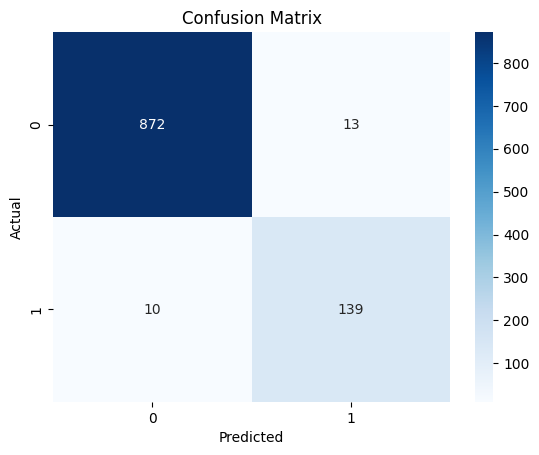

- **Accuracy:**
  The accuracy score of approximately 97.78% indicates the percentage of correct predictions, demonstrating the model's overall effectiveness.

- **Precision:**
  The precision score of approximately 91.45% reveals the proportion of correctly predicted spam messages among all messages predicted as spam.

- **F1 Score:**
  The F1 score, balancing precision and recall, is approximately 92.36%, illustrating the model's robustness in handling imbalanced class distributions.

**6. Visualizations**

To enhance the presentation of results, several visualizations were incorporated.

- **Class Distribution Bar Chart:**
  A bar chart displaying the distribution of 'ham' and 'spam' classes in the dataset.

  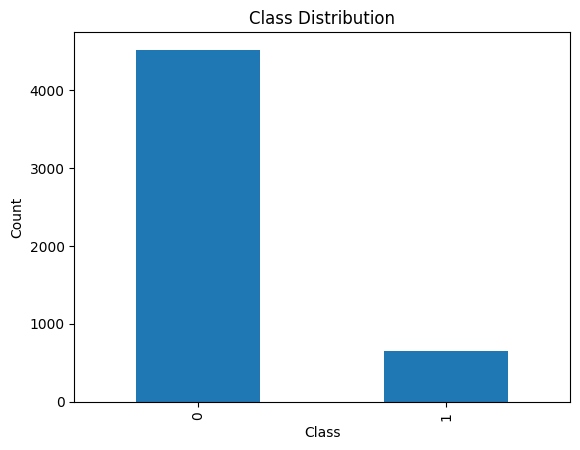

- **Confusion Matrix Heatmap:**
  A heatmap visualization of the confusion matrix provides a clear representation of the model's performance.

  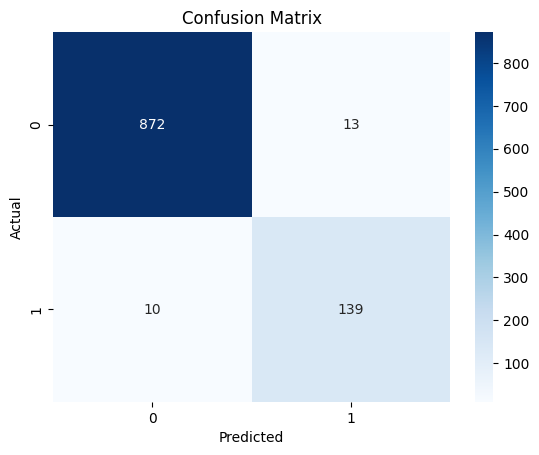

- **Metrics Comparison Bar Chart:**
  A bar chart comparing accuracy, precision, and F1 score for a comprehensive overview of the model's performance.

  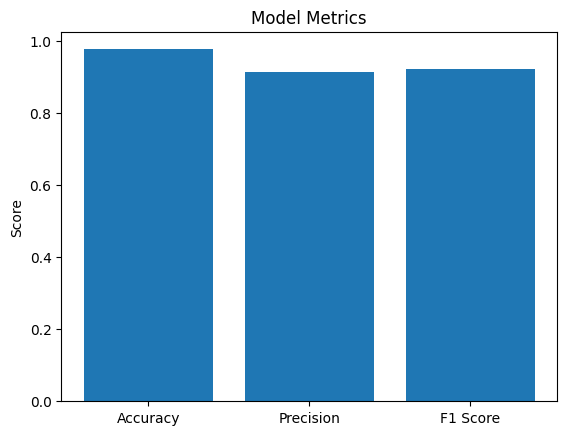

**7. Conclusion**

In conclusion, the developed spam email detection model utilizing a Multinomial Naive Bayes classifier demonstrates high accuracy, precision, and F1 score. The visualizations provide additional insights into the model's behavior and aid in communicating the results effectively. Continuous monitoring and updates to the model may be necessary to adapt to evolving spam email patterns.